In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report, confusion_matrix  

In [2]:
df = pd.read_csv("Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
y = np.array(df[['Species']])
x = np.array(df.drop(['Id','Species'], axis=1))

In [5]:
print("y")
print(y[0:5])
print("x")
print(x[0:5])

y
[['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']
 ['Iris-setosa']]
x
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [7]:
#Split Data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, stratify=y)

In [8]:
# Para treinar o kernel SVM, usamos a mesma classe SVC da biblioteca svm do Scikit-Learn. 
# A diferença está no valor do parâmetro do kernel da classe SVC. 
# No caso do SVM simples, usamos "linear" como o valor para o parâmetro do kernel. 
# No entanto, para SVM do kernel você pode usar o kernel Gaussiano, polinomial, sigmóide ou computável.

1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        17
 Iris-virginica       1.00      1.00      1.00        17

       accuracy                           1.00        50
      macro avg       1.00      1.00      1.00        50
   weighted avg       1.00      1.00      1.00        50



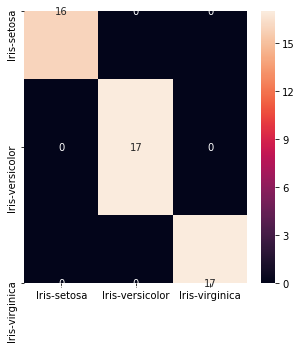

In [9]:
#Linear SVM

#Fit The plot
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(x_train, y_train.ravel())


#Calculate Test Prediction
y_pred = model.predict(x_test)
print(model.score(x_test,y_test.ravel()))

#Plot Confusion Matrix

cm = confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cm, index = [i for i in np.unique(y)],
                  columns = [i for i in np.unique(y)])
plt.figure(figsize = (5,5))
sn.heatmap(df_cm, annot=True)

print(classification_report(y_test, y_pred))  

In [10]:
# No caso do kernel polinomial, você também precisa passar um valor para o parâmetro degree da classe SVC. 
# Isso basicamente é o grau do polinômio. 

0.96
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.94      0.94      0.94        17
 Iris-virginica       0.94      0.94      0.94        17

       accuracy                           0.96        50
      macro avg       0.96      0.96      0.96        50
   weighted avg       0.96      0.96      0.96        50



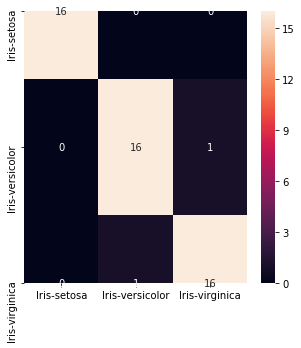

In [11]:
#Fit The plot
from sklearn.svm import SVC

model = SVC(kernel='poly', degree=8)
model.fit(x_train, y_train.ravel())


#Calculate Test Prediction
y_pred = model.predict(x_test)
print(model.score(x_test,y_test.ravel()))

#Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)


df_cm = pd.DataFrame(cm, index = [i for i in np.unique(y)],
                  columns = [i for i in np.unique(y)])
plt.figure(figsize = (5,5))
sn.heatmap(df_cm, annot=True)
print(classification_report(y_test, y_pred))  

In [12]:
# Vamos usar um kernel sigmoid para implementar o Kernel SVM.

0.32


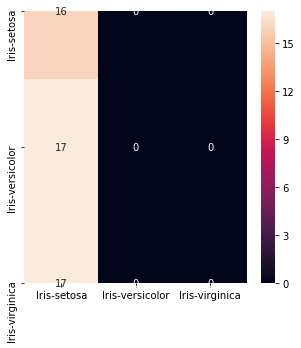

In [13]:
#Fit The plot
from sklearn.svm import SVC

model = SVC(kernel='sigmoid')
model.fit(x_train, y_train.ravel())

#Calculate Test Prediction
y_pred = model.predict(x_test)
print(model.score(x_test,y_test.ravel()))

#Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cm, index = [i for i in np.unique(y)],
                  columns = [i for i in np.unique(y)])
plt.figure(figsize = (5,5))
sn.heatmap(df_cm, annot=True)

In [14]:
# Para usar o kernel gaussiano, você precisa especificar 'rbf' 
# como valor para o parâmetro Kernel da classe SVC.

0.98


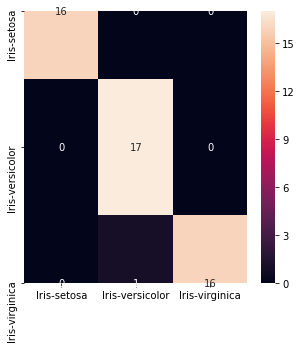

In [16]:
#Non-linear SVM

#Fit The plot
from sklearn.svm import SVC

model = SVC(kernel='rbf')
model.fit(x_train, y_train.ravel())


#Calculate Test Prediction
y_pred = model.predict(x_test)
print(model.score(x_test,y_test.ravel()))

#Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cm, index = [i for i in np.unique(y)],
                  columns = [i for i in np.unique(y)])
plt.figure(figsize = (5,5))
sn.heatmap(df_cm, annot=True)

In [17]:
# Comparação do desempenho do kernel

# Se compararmos o desempenho dos diferentes tipos de kernels, podemos ver claramente que o kernel sigmóide 
# executa o pior. 
# Isso se deve ao motivo pelo qual a função sigmóide retorna dois valores, 0 e 1, portanto, é mais adequado 
# para problemas de classificação binária. No entanto, no nosso caso, tivemos três classes de saída.

# Entre o kernel gaussiano e o núcleo polinomial, podemos ver que o kernel gaussiano alcançou uma taxa de 
# previsão próximo de 100%, enquanto o kernel polinomial classificou erroneamente uma instância. 

# Portanto, o kernel gaussiano teve um desempenho um pouco melhor. 

# No entanto, não existe uma regra rígida quanto ao melhor desempenho do kernel em todos os cenários. 
# É tudo sobre como testar todos os kernels e selecionar aquele com os melhores resultados no seu conjunto 
# de dados de teste.